Instalação e importação de bibliotecas

In [1]:
!pip install pdfplumber

     |████████████████████████████████| 51kB 3.7MB/s 
     |████████████████████████████████| 5.6MB 7.3MB/s 
     |████████████████████████████████| 143kB 36.5MB/s 
     |████████████████████████████████| 1.9MB 34.9MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.5.28-cp37-none-any.whl size=32241 sha256=7241d88c2b8208952513cfd2f89a8e2388d316b5d93c14fa116ed369a2ed9076
  Stored in directory: /root/.cache/pip/wheels/5a/9b/3d/37e37d93650be964fdd2a9babf174214fec8a0f4d222d474ab
Successfully built pdfplumber


In [2]:
import pdfplumber
import nltk

Após importar as bibliotecas para carregar o arquivo em pdf, utilizei as função "extract_text" pra extrair o conteúdo da página desejada.


Logo após utilizei as funções metadata e hyperlink, para verificar informações como se o currículo esta atualizado e os links que contém no mesmo.



In [5]:
curriculopdf = pdfplumber.open('/content/drive/MyDrive/NLP/curriculo/robert_curriculo.pdf')
texto_curriculo = curriculopdf.pages[0].extract_text()

In [6]:
# curriculopdf.hyperlinks
curriculopdf.metadata

{'Author': 'Robert Thiago De Sousa Ferro',
 'CreationDate': "D:20210615005305+00'00'",
 'Creator': 'Canva',
 'Keywords': 'DAEedaxMock,BADdEhuxYCQ',
 'ModDate': "D:20210615005305+00'00'",
 'Producer': 'Canva',
 'Title': 'Roxo Escuro Foto de Mulher Atendimento ao Cliente Currículo'}

Texto do currículo

In [7]:
print(texto_curriculo)

EXPERIÊNCIAS PROFISSIONAIS
CIENTISTA DE DADOS
AUTÔNOMO - 01/05/2021 até o presente momento..
Desenvolvendo e modelos preditivos utilizando Machine
Learning. Ex : Segmentação de clientes, análise de risco
de crédito, previsão de faturamento.
ROBERT THIAGO DE
ENGENHEIRO ELETRICISTA
SOUSA FERRO
TORRES  INSTALAÇÕES  ELÉTRICAS  -  01/01/19  até  o
presente momento
CIENTISTA DE DADOS
ENGENHEIRO ELETRICISTA Atuando  como  terceirizado,  elaborando  projetos  de
subestação,  geração  de  energia  elétrica,  cabeamento
estruturado,  inspeções  em  subestações,  laudos,
orçamentos, utilizando Excel para análise e controle dos
PERFIL dados referentes a cada projeto.
Sou  engenheiro  eletricista,  tenho  28  anos  e SERVIDOR PÚBLICO ESTADUAL
trabalho há 3 anos desenvolvendo projetos nessa
área.    Na  minha  formação  como  cientista  de POLÍCIA  MILITAR  DO  MARANHÃO  -  25/07/18  até  o
dados  conclui  alguns  cursos  online    que  me presente momento.
deram    conhecimento  para  solucionar
pr

# **Pré-processamento de texto**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# A função word_tokenize() quebra o texto em palavras individuais.
nltk.download('punkt')
lista_de_palavras = nltk.tokenize.word_tokenize(texto_curriculo)

# Padronizando as palavras apenas com letras minúsculas.
lista_de_palavras = [palavra.lower() for palavra in lista_de_palavras]

lista_de_palavras[0:20]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['experiências',
 'profissionais',
 'cientista',
 'de',
 'dados',
 'autônomo',
 '-',
 '01/05/2021',
 'até',
 'o',
 'presente',
 'momento..',
 'desenvolvendo',
 'e',
 'modelos',
 'preditivos',
 'utilizando',
 'machine',
 'learning',
 '.']

In [9]:
#Criando uma lista que contém pontuação que desejamos remover
pontuacao = ['(',')',';',':','[',']',',']

#Criando uma lista de stop words "a", "de", "um"que não tem valor como palavra
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('portuguese')


#criando uma lista de palavra sem stopword e pontuações
keywords = [palavra for palavra in lista_de_palavras if not palavra in stop_words and not palavra in pontuacao]
keywords


# concatenar as palavras
textocv = " ".join(s for s in keywords)
textocv[0:250]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'experiências profissionais cientista dados autônomo - 01/05/2021 presente momento.. desenvolvendo modelos preditivos utilizando machine learning . ex segmentação clientes análise risco crédito previsão faturamento . robert thiago engenheiro eletricis'

In [10]:
#numero de palavras das reviews
len(keywords)

367

# **Criando uma nuvem de palavras**

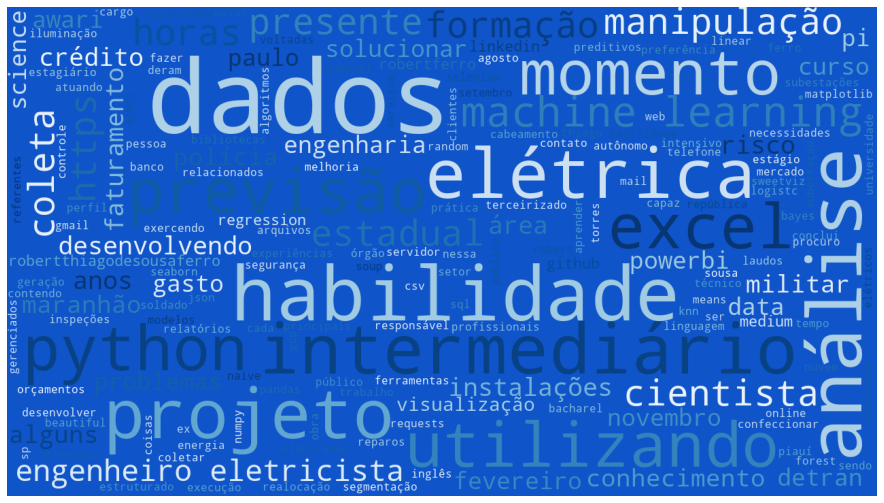

In [11]:
# gerar uma wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = '#0f54c9', 
                      max_font_size = 150, 
                      width = 1280, 
                      height = 720, 
                      colormap= 'Blues').generate(textocv) 

# mostrar a imagem final
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 9))
ax.imshow(wordcloud)
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file("wordcloud.png")
plt.show()

# Criando uma função para plotar uma nuvem de palavras.

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def NuvemDePalavras(cv, salvar = True):
    '''
    cv: caminho de um arquivo PDF 
    '''
    arquivoPDF = pdfplumber.open(cv)
    primeira_pagina = arquivoPDF.pages[0]  #lê apenas a primeira página
    textoCRU = primeira_pagina.extract_text()

    lista_de_palavras = nltk.tokenize.word_tokenize(textoCRU)  # transforma o texto cru em uma lista de termos
    lista_de_palavras = [palavra.lower() for palavra in lista_de_palavras]  # deixando tudo minusculo

    keywords = [palavra for palavra in lista_de_palavras if not palavra in stop_words and not palavra in pontuacao]  # tira as pontuacoes e stopwords 
    textocv = " ".join(s for s in keywords)  # junta tudo em um texto só novamente. 


    wordcloud = WordCloud(background_color = '#0f54c9', 
                          max_font_size = 150, 
                          width = 1280, 
                          height = 720, 
                          colormap= 'Blues').generate(textocv) 
 
    # mostrar a imagem final
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.imshow(wordcloud)
    ax.set_axis_off()
    plt.imshow(wordcloud)

    if salvar:
        wordcloud.to_file("wordcloud.png")

    plt.show()

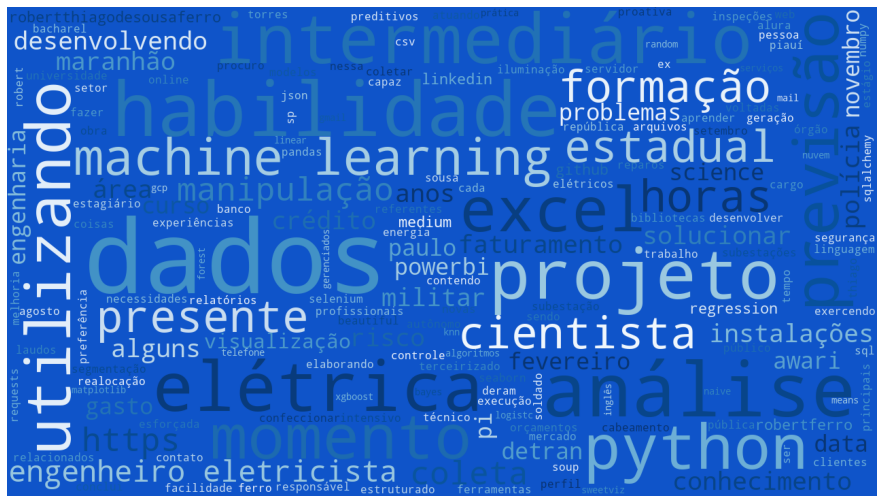

In [13]:
NuvemDePalavras('/content/drive/MyDrive/NLP/curriculo/robert_curriculo.pdf')

# **Analisando compatibilidade de currículos com vagas**

In [14]:

import pandas as pd

vagas = pd.read_excel('/content/drive/MyDrive/NLP/curriculo/vagas.xlsx', sheet_name = None)

n_vagas = len(vagas.keys())
nome_vagas = list(vagas.keys())

# transformando a saida numa lista de dataframes (cada dataframe representa uma vaga)
vagas = [vagas[nome_vagas[i]] for i in range(n_vagas)]

In [16]:
import numpy as np

# Quantidade máxima que será contabilizado de cada palava chave encontrada no currículo
limite = 5

for i in range(n_vagas):
  pesos = list(vagas[i]['pesos'])
  palavras_chaves = list(vagas[i]['palavras-chave'])
  pmax = np.sum(np.array(pesos) * limite)
  vaga = nome_vagas[i].replace('_',' ').upper()
  
  cont = [textocv.count(pc) for pc in palavras_chaves]
  # limitar pelo threshold
  def aux(x):
      return x if x <= limite else limite

  cont = [aux(i) for i in cont]
  pont = (np.array(cont) * pesos).sum()
  score = ((np.array(cont) * pesos).sum()/pmax).round(4)

  
  print('Pontuação máxima para a vaga {} : {}'.format(vaga,pmax))
  print()
  print('Pontuacao para a vaga {} : {}'.format(vaga,pont))
  print()
  print('Score para a vaga {} : {}'.format(vaga,score))

  print('='*40)

Pontuação máxima para a vaga DS SENIOR : 55

Pontuacao para a vaga DS SENIOR : 14

Score para a vaga DS SENIOR : 0.2545
Pontuação máxima para a vaga DS JUNIOR : 40

Pontuacao para a vaga DS JUNIOR : 8

Score para a vaga DS JUNIOR : 0.2
Pontuação máxima para a vaga ENG DADOS : 60

Pontuacao para a vaga ENG DADOS : 6

Score para a vaga ENG DADOS : 0.1
Pontuação máxima para a vaga MARKETING : 50

Pontuacao para a vaga MARKETING : 2

Score para a vaga MARKETING : 0.04


In [17]:

# contando as palavras chaves que ocorrem no CV

cont = [textocv.count(pc) for pc in palavras_chaves]



# limitar pelo threshold
def aux(x):
    return x if x <= limite else limite

cont = [aux(i) for i in cont]
cont

[0, 0, 0, 2, 0, 0]

In [18]:
score = ((np.array(cont) * pesos).sum()/pmax).round(4)
score

0.04

In [19]:
# função entrada: CV saida, vaga - saida: score

pontuacao = ['(', ')', ';', ':', '[', ']', ',']
stop_words = nltk.corpus.stopwords.words('portuguese')

def MatchCV(cv, vaga, limite = 5):
    '''
    cv: caminho de um arquivo PDF
    vaga: dataset de palavras-chave e pesos
    '''

    arquivoPDF = pdfplumber.open(cv)
    primeira_pagina = arquivoPDF.pages[0]  #lê apenas a primeira página
    textoCRU = primeira_pagina.extract_text()

    lista_de_palavras = nltk.tokenize.word_tokenize(textoCRU)  # transforma o texto cru em uma lista de termos
    lista_de_palavras = [palavra.lower() for palavra in lista_de_palavras]  # deixando tudo minusculo

    keywords = [palavra for palavra in lista_de_palavras if not palavra in stop_words and not palavra in pontuacao]  # tira as pontuacoes e stopwords 
    textocv = " ".join(s for s in keywords)  # junta tudo em um texto só novamente. 

    pesos = list(vaga['pesos'])
    palavras_chaves = list(vaga['palavras-chave'])

    cont = [textocv.count(pc) for pc in palavras_chaves]  # conta quantas vezes cada termo da vaga aparece no texto do cv

    def aux(x, limite):
        return x if x <= limite else limite

    cont = [aux(i, limite) for i in cont]   # coloca o limite na contagem de palavras

    pmax = np.sum(np.array(pesos) * limite) 

    score = ((np.array(cont) * pesos).sum()/pmax).round(4)

    return score

In [22]:
MatchCV('/content/drive/MyDrive/NLP/curriculo/robert_curriculo.pdf', vagas[1])

0.2